In [2]:
import json

# Replace './results' with your actual output directory
trainer_state_path = './results_300M_diverse_shuffle_75train/checkpoint-5148/trainer_state.json'

train_losses = []
eval_losses = []
grad_norms = []
train_steps = []
eval_steps = []

try:
    with open(trainer_state_path, 'r') as f:
        trainer_state = json.load(f)
    
    # Print logged metrics
    for log in trainer_state['log_history']:
        if 'eval_loss' in log.keys():
            eval_losses.append(log['eval_loss'])
            eval_steps.append(log['step'])
        elif 'loss' in log.keys():
            train_losses.append(log['loss'])
            train_steps.append(log['step'])
        if 'grad_norm' in log.keys():
            grad_norms.append(log['grad_norm'])
except FileNotFoundError:
    print("Trainer state file not found.")

print("Len train losses: ", len(train_losses))
print("Len eval losses: ", len(eval_losses))
print("Len grad norms: ", len(grad_norms))
print("Len steps: ", len(train_steps))
print(train_steps)


Len train losses:  270
Len eval losses:  16
Len grad norms:  270
Len steps:  270
[19, 38, 57, 76, 95, 114, 133, 152, 171, 190, 209, 228, 247, 266, 285, 304, 323, 342, 361, 380, 399, 418, 437, 456, 475, 494, 513, 532, 551, 570, 589, 608, 627, 646, 665, 684, 703, 722, 741, 760, 779, 798, 817, 836, 855, 874, 893, 912, 931, 950, 969, 988, 1007, 1026, 1045, 1064, 1083, 1102, 1121, 1140, 1159, 1178, 1197, 1216, 1235, 1254, 1273, 1292, 1311, 1330, 1349, 1368, 1387, 1406, 1425, 1444, 1463, 1482, 1501, 1520, 1539, 1558, 1577, 1596, 1615, 1634, 1653, 1672, 1691, 1710, 1729, 1748, 1767, 1786, 1805, 1824, 1843, 1862, 1881, 1900, 1919, 1938, 1957, 1976, 1995, 2014, 2033, 2052, 2071, 2090, 2109, 2128, 2147, 2166, 2185, 2204, 2223, 2242, 2261, 2280, 2299, 2318, 2337, 2356, 2375, 2394, 2413, 2432, 2451, 2470, 2489, 2508, 2527, 2546, 2565, 2584, 2603, 2622, 2641, 2660, 2679, 2698, 2717, 2736, 2755, 2774, 2793, 2812, 2831, 2850, 2869, 2888, 2907, 2926, 2945, 2964, 2983, 3002, 3021, 3040, 3059, 3078, 309

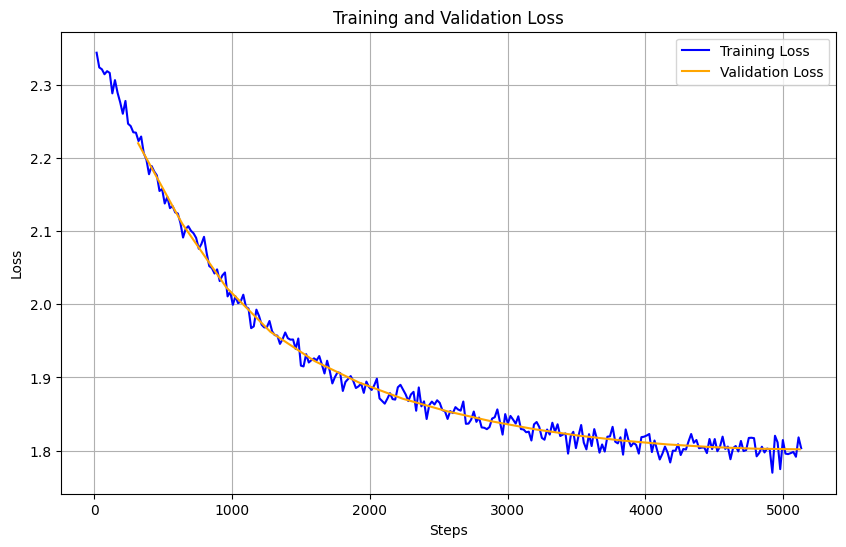

In [3]:
from matplotlib import pyplot as plt

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_losses, label="Training Loss", color="blue")
# plt.plot(train_steps, grad_norms, label="Grad Norms", color="yellow")
plt.plot(eval_steps, eval_losses, label="Validation Loss", color="orange")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()